Objective:

3) Using Pandas


In [1]:
# add in the numpy,pandas, and matplotlib modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#make printing of dataframes a bit prettier
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 1)

Cases based on CDC report

In [3]:
#total_population = 331 million
# summarize in terms of 100,000 individuals
# young < 18
# mid : 18-49
# old : 50+
total_pop = 3310
# percentages in each age range
mid_per = .42
old_per = .36
sum_per = mid_per + old_per
# percentages in each age range relative to their sum
mid_frac = mid_per/sum_per
old_frac = old_per/sum_per

total_mid =  mid_per * total_pop
total_old = old_per * total_pop
print(total_pop,total_mid,total_old, mid_frac,old_frac)

3310 1390.2 1191.6 0.5384615384615384 0.4615384615384615


In [4]:
# COVID cases June 20 - July 17
# for each age range, create 2D arrays for weekly averages of total cases
    # rows are UnVac, Vac
    # columns are Positive Cases, Hospitiliations, Death
#from CDC report Sept 10, 2021

mid = [[76237,2666,155],[13030,146,7]]
print(mid)
old = [[17083+8093,1755+1688,290+561],[5027+4752,234+571,23+158]]
print(old)
 
# Create the pandas DataFrames: 3 columns, 2 rows
df_m = pd.DataFrame(mid, columns = ['Pos', 'Hosp', 'Death'],index=['UnVac','Vac'])
df_o = pd.DataFrame(old, columns = ['Pos', 'Hosp', 'Death'],index=['UnVac','Vac'])
#sum all values into new data frame 
df_t = df_m+df_o
print('\n Totals \n',df_t,'\n')
#merge all three into one dataframe, df_a, using keys based on age
df_a = pd.concat([df_m, df_o,df_t], keys=('18-49','50+','All'))
display(df_a)
print(df_a.keys())

[[76237, 2666, 155], [13030, 146, 7]]
[[25176, 3443, 851], [9779, 805, 181]]

 Totals 
          Pos   Hosp  Death
UnVac  101413  6109  1006 
Vac     22809   951   188  



Pos   Hosp  Death
18-49 UnVac   76237  2666   155 
      Vac     13030   146     7 
50+   UnVac   25176  3443   851 
      Vac      9779   805   181 
All   UnVac  101413  6109  1006 
      Vac     22809   951   188

Index(['Pos', 'Hosp', 'Death'], dtype='object')


In [5]:
#show how to get to specific values in MultIndex Pandas dataframe. 
#Can use combinations of keys and define all case in  dimension using :
display(df_a["Pos"][:,"UnVac"])
display(df_a["Death"][:,"Vac"])

18-49     76237
50+       25176
All      101413
Name: Pos, dtype: int64

18-49      7
50+      181
All      188
Name: Death, dtype: int64

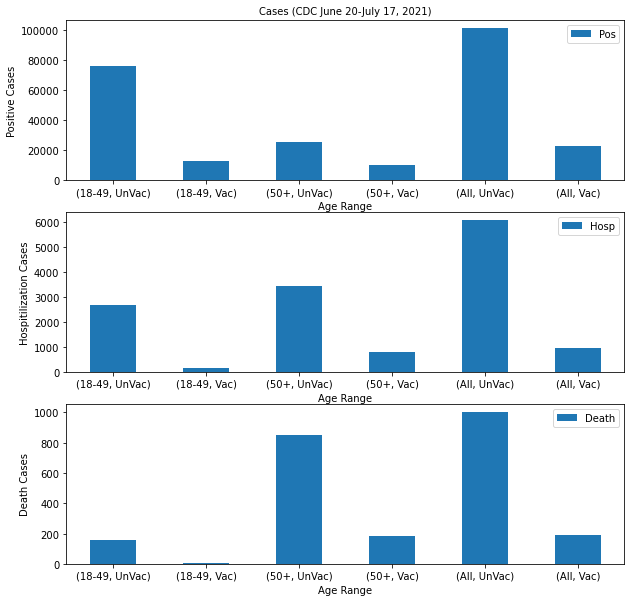

In [6]:
#pandas uses maplotlib to plot
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(10,10))

#plot all in the Positive column
df_a['Pos'][:,:].plot(ax=axes[0],kind='bar',fontsize='10',rot=0)
axes[0].set_title('Cases (CDC June 20-July 17, 2021)', fontsize=10)
axes[0].set_xlabel('Age Range', fontsize=10)
axes[0].set_ylabel('Positive Cases', fontsize=10)
axes[0].legend(fontsize=10)

#plot all in the Hospitilization column
df_a['Hosp'][:,:].plot(ax=axes[1],kind='bar',fontsize='10',rot=0)
axes[1].set_xlabel('Age Range', fontsize=10)
axes[1].set_ylabel('Hospitilization Cases', fontsize=10)
axes[1].legend(fontsize=10)

#plot all in the Death column
df_a['Death'][:,:].plot(ax=axes[2],kind='bar',fontsize='10',rot=0)
axes[2].set_xlabel('Age Range', fontsize=10)
axes[2].set_ylabel('Death Cases', fontsize=10)
axes[2].legend(fontsize=10)
plt.savefig('covid_cases.png')

In [7]:
#compute conditional probabilities given Positive test  and add to the dataframe
df_a['Hosp % given Pos']= 100.*df_a["Hosp"][:,:]/df_a["Pos"][:,:]
df_a['Death 10th % given Pos'] = 1000.*df_a["Death"][:,:]/df_a["Pos"][:,:]
display(df_a)

Pos   Hosp  Death  Hosp % given Pos  Death 10th % given Pos
18-49 UnVac   76237  2666   155          3.5                  2.0         
      Vac     13030   146     7          1.1                  0.5         
50+   UnVac   25176  3443   851         13.7                 33.8         
      Vac      9779   805   181          8.2                 18.5         
All   UnVac  101413  6109  1006          6.0                  9.9         
      Vac     22809   951   188          4.2                  8.2

In [8]:
#compute conditional probabilities given All Pos Hosp and Deaths, what % of those are Unvac vs Vac  
df_c = pd.DataFrame(index = ['18-49', '50+', 'All'])
df_c['UnVac Pos']= 100.*df_a["Pos"][:,"UnVac"]/(df_a["Pos"][:,"UnVac"]+df_a["Pos"][:,"Vac"])
df_c['Vac Pos']= 100.*df_a["Pos"][:,"Vac"]/(df_a["Pos"][:,"UnVac"]+df_a["Pos"][:,"Vac"])
df_c['UnVac Hosp']= 100.*df_a["Hosp"][:,"UnVac"]/(df_a["Hosp"][:,"UnVac"]+df_a["Hosp"][:,"Vac"])
df_c['Vac Hosp']= 100.*df_a["Hosp"][:,"Vac"]/(df_a["Hosp"][:,"UnVac"]+df_a["Hosp"][:,"Vac"])
df_c['UnVac Death']= 100.*df_a["Death"][:,"UnVac"]/(df_a["Death"][:,"UnVac"]+df_a["Death"][:,"Vac"])
df_c['Vac Death']= 100.*df_a["Death"][:,"Vac"]/(df_a["Death"][:,"UnVac"]+df_a["Death"][:,"Vac"])

display(df_c)

UnVac Pos  Vac Pos  UnVac Hosp  Vac Hosp  UnVac Death  Vac Death
18-49    85.4      14.6       94.8        5.2       95.7         4.3   
50+      72.0      28.0       81.0       19.0       82.5        17.5   
All      81.6      18.4       86.5       13.5       84.3        15.7

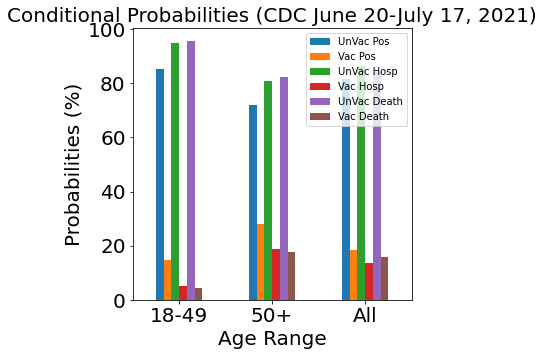

In [9]:
#pandas uses maplotlib to plot
ax1 = df_c.plot.bar(rot=0, figsize=(5, 5),fontsize='20')
ax1.set_title('Conditional Probabilities (CDC June 20-July 17, 2021)', fontsize=20)
ax1.set_xlabel('Age Range', fontsize=20)
ax1.set_ylabel('Probabilities (%)', fontsize=20)
ax1.legend(fontsize=10,loc=1)
plt.savefig('covid_cond_prob.png')

In [10]:
# compute incidence ratios. 
#Relative risk for unVac compared to Vac for Pos, Hosp, Death categories
ir = pd.DataFrame(index = ['18-49', '50+', 'All'])
ir['Pos']= df_a["Pos"][:,"UnVac"]/df_a["Pos"][:,"Vac"]
ir['Hosp']= df_a["Hosp"][:,"UnVac"]/df_a["Hosp"][:,"Vac"]
ir['Death']=df_a["Death"][:,"UnVac"]/df_a["Death"][:,"Vac"]
display(ir)

Pos  Hosp  Death
18-49  5.9  18.3  22.1 
50+    2.6   4.3   4.7 
All    4.4   6.4   5.4

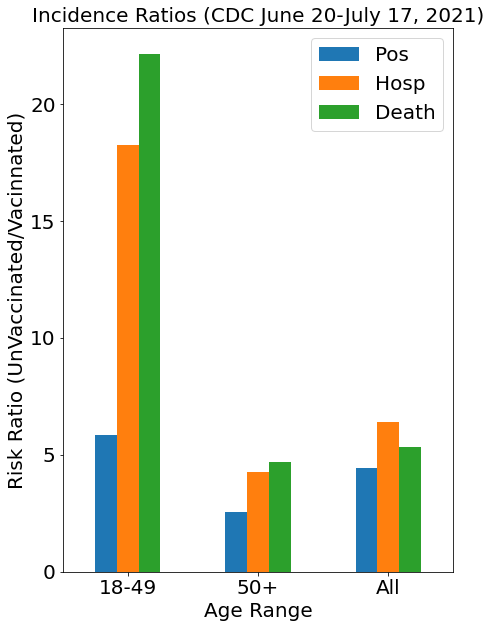

In [11]:
#pandas uses maplotlib to plot
ax = ir.plot.bar(rot=0, figsize=(7, 10),fontsize='20')
ax.set_title('Incidence Ratios (CDC June 20-July 17, 2021)', fontsize=20)
ax.set_xlabel('Age Range', fontsize=20)
ax.set_ylabel('Risk Ratio (UnVaccinated/Vacinnated)', fontsize=20)
ax.legend(fontsize=20)
plt.savefig('covid_ir.png')